# Boston Normalized Dataset -- KNN Regression

- Steps without HP Tuning
1. Data Gathering
2. EDA
3. Scaling -- Normalization
4. Model Building
5. Prediction
6. Evaluation

-- Test Data
 - MSE:  35.888149019607845
 - MAE:  3.9192156862745104
 - RMSE:  5.990671833743511
 - R2 Score:  0.6679420660847045
 
-- Train Data
 - MSE:  14.972556435643565
 - MAE:  2.408910891089109
 - RMSE:  3.8694387752804107
 - R2 Score:  0.8088773387674731
 
###########################################################################################
- Steps with HP Tuning [K=2,P=1]
1. Data Gathering
2. EDA
3. Scaling -- Normalization
4. Hyperparameter Tuning
5. Model Building
6. Prediction
7. Evaluation

-- Test Data
 - MSE:  20.832009803921572
 - MAE:  3.214705882352941
 - RMSE:  4.564209658190734
 - R2 Score:  0.807250183590857
 
-- Train Data
 - MSE:  5.407320544554455
 - MAE:  1.535519801980198
 - RMSE:  2.3253646046490117
 - R2 Score:  0.9309762833718688

#### Import libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pickle
import json

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

#### Data Gathering

In [4]:
dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
df = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df['PRICE'] = dataset['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### EDA 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Scaling -- Normalization

In [8]:
x = df.drop('PRICE',axis=1)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
y = df['PRICE']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


##### Normalizing only train data

In [13]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000
mean,3.621175,11.295792,11.064530,0.074257,0.553977,6.265824,68.069554,3.837116,9.301980,403.586634,18.405941,359.34948,12.637847
std,9.062456,23.047039,6.782993,0.262514,0.117115,0.683905,28.486154,2.096137,8.558246,166.235415,2.127736,87.15085,7.009719
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.32000,1.920000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.887750,42.750000,2.116550,4.000000,281.000000,17.225000,376.72250,6.907500
50%,0.248605,0.000000,9.125000,0.000000,0.538000,6.167000,76.700000,3.275900,5.000000,330.000000,18.800000,391.70500,11.490000
75%,3.023262,12.500000,18.100000,0.000000,0.624000,6.565500,94.100000,5.287300,8.000000,666.000000,20.200000,396.30750,16.672500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.90000,37.970000


In [14]:
norm_scalar = MinMaxScaler()
norm_scalar.fit(x_train) #we are storing max and min values
arr = norm_scalar.transform(x_train)

x_train_norm = pd.DataFrame(arr,columns=x_train.columns)
x_train_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.003749,0.22,0.197947,0.0,0.094650,0.456579,0.329557,0.629805,0.260870,0.272901,0.755814,0.983055,0.200832
1,0.000533,0.00,0.493402,0.0,0.106996,0.546268,0.495366,0.439287,0.130435,0.194656,0.395349,0.989788,0.151734
2,0.025785,0.00,0.700880,0.0,0.452675,0.499492,0.959835,0.088243,0.173913,0.412214,0.244186,0.748323,0.254646
3,0.043199,0.00,0.646628,1.0,0.792181,0.514948,0.907312,0.125090,1.000000,0.914122,0.883721,0.985980,0.314840
4,0.001351,0.25,0.171188,0.0,0.139918,0.589587,0.417096,0.623021,0.304348,0.185115,0.825581,0.996672,0.210264


##### Normalizing test data

In [15]:
arr = norm_scalar.transform(x_test)
x_test_norm = pd.DataFrame(arr,columns=x_test.columns)
x_test_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002782,0.000,0.236437,0.0,0.129630,0.312386,0.951596,0.431067,0.086957,0.087786,0.616279,1.000000,0.801387
1,0.000148,0.175,0.033724,0.0,0.063992,0.659142,0.582904,0.735962,0.086957,0.055344,0.697674,0.990771,0.170042
2,0.052159,0.000,0.646628,0.0,0.471193,0.633923,0.666323,0.127609,1.000000,0.914122,0.883721,0.943971,0.270180
3,0.041220,0.000,0.646628,0.0,0.407407,0.498068,0.504634,0.260264,1.000000,0.914122,0.883721,0.979121,0.240222
4,0.003281,0.000,0.210411,0.0,0.244856,0.777507,0.145211,0.204194,0.304348,0.229008,0.558140,0.951107,0.055479


#### Model Building 

In [16]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train_norm,y_train)

KNeighborsRegressor()

#### Prediction

In [18]:
#test data

y_test_pred = knn_reg.predict(x_test_norm)

print("Ya -- Yp")
for i in range(15,21):
    print(y_test.iloc[i],y_test_pred[i])

Ya -- Yp
18.6 15.0
28.7 21.58
23.7 20.700000000000003
13.1 10.040000000000001
25.0 20.24
11.9 20.560000000000002


In [19]:
#train data

y_train_pred = knn_reg.predict(x_train_norm)

print("Ya -- Yp")
for i in range(15,21):
    print(y_train.iloc[i],y_train_pred[i])

Ya -- Yp
13.6 13.819999999999999
14.1 13.879999999999999
44.8 43.3
21.2 21.6
21.4 24.520000000000003
22.0 21.42


#### Evaluation

In [20]:
# Testing Data 

mse = mean_squared_error(y_test,y_test_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_test,y_test_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_test,y_test_pred)
print("R2 Score: ",score)

MSE:  35.888149019607845
MAE:  3.9192156862745104
RMSE:  5.990671833743511
R2 Score:  0.6679420660847045


In [21]:
# Training data

mse = mean_squared_error(y_train,y_train_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_train,y_train_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_train,y_train_pred)
print("R2 Score: ",score)

MSE:  14.972556435643565
MAE:  2.408910891089109
RMSE:  3.8694387752804107
R2 Score:  0.8088773387674731


### With HP Tuning

[(1, 2, 0.12, 0.93, 0.81), (1, 3, 0.11, 0.89, 0.78), (1, 4, 0.12, 0.86, 0.74), (1, 5, 0.13, 0.83, 0.7), (1, 6, 0.13, 0.81, 0.68), (1, 7, 0.11, 0.8, 0.69), (1, 8, 0.09, 0.78, 0.69), (1, 9, 0.07, 0.76, 0.69), (1, 10, 0.04, 0.75, 0.71), (1, 11, 0.04, 0.74, 0.7), (1, 12, 0.03, 0.72, 0.69), (1, 13, 0.02, 0.71, 0.69), (1, 14, 0.02, 0.69, 0.67), (1, 15, 0.02, 0.69, 0.67), (1, 16, 0.01, 0.68, 0.67), (1, 17, 0.0, 0.67, 0.67), (1, 18, 0.0, 0.67, 0.67), (1, 19, 0.01, 0.66, 0.67), (1, 20, 0.0, 0.66, 0.66)]

[(2, 2, 0.18, 0.93, 0.75), (2, 3, 0.12, 0.89, 0.77), (2, 4, 0.13, 0.85, 0.72), (2, 5, 0.14, 0.81, 0.67), (2, 6, 0.14, 0.79, 0.65), (2, 7, 0.14, 0.79, 0.65), (2, 8, 0.13, 0.76, 0.63), (2, 9, 0.13, 0.74, 0.61), (2, 10, 0.11, 0.73, 0.62), (2, 11, 0.11, 0.72, 0.61), (2, 12, 0.1, 0.7, 0.6), (2, 13, 0.07, 0.69, 0.62), (2, 14, 0.07, 0.69, 0.62), (2, 15, 0.06, 0.68, 0.62), (2, 16, 0.05, 0.67, 0.62), (2, 17, 0.04, 0.66, 0.62), (2, 18, 0.03, 0.65, 0.62), (2, 19, 0.02, 0.64, 0.62), (2, 20, 0.02, 0.64, 0.6

Text(0.5, 1.0, 'Comparision of train test score')

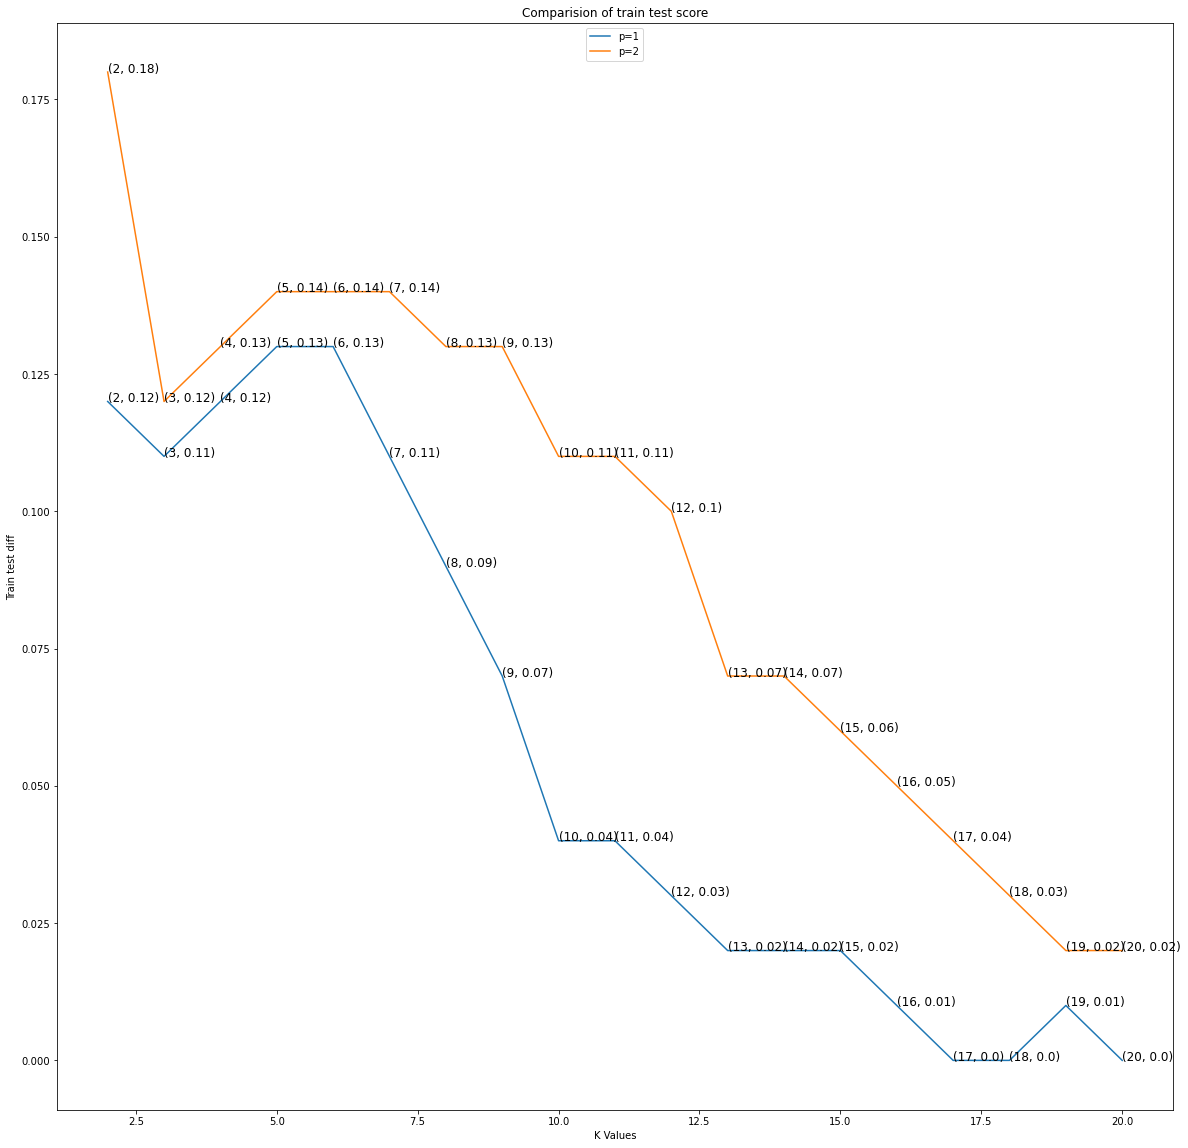

In [27]:
plt.figure(figsize=(20,20))

k_values = range(2,21)
p_values = [1,2]

for p_value in p_values:
    r2_train_list = []
    r2_test_list = []
    diff_list = []
    HP_data = []
    
    for k in k_values:
        knn_reg = KNeighborsRegressor(n_neighbors=k,p=p_value)
        knn_reg.fit(x_train_norm,y_train)
        #train score
        r2_train = round(knn_reg.score(x_train_norm,y_train),2)
        r2_train_list.append(r2_train)
        
        #test score
        r2_test = round(knn_reg.score(x_test_norm,y_test),2)
        r2_test_list.append(r2_test)
        
        diff = round(abs(r2_train-r2_test),4)
        diff_list.append(diff)
        
        HP_data.append((p_value,k,diff,r2_train,r2_test))
        
    HP_data = sorted(HP_data,key=lambda x:x[3],reverse=True)
    print(HP_data,end="\n\n")
    
    plt.plot(k_values,diff_list,label=f"p={p_value}")
    for i in range(len(k_values)):
        plt.text(k_values[i],diff_list[i],(k_values[i],diff_list[i]),size=12)
        

leg = plt.legend(loc = 'upper center')
plt.xlabel('K Values')
plt.ylabel('Train test diff')
plt.title('Comparision of train test score')      

## K=2 and P=1
Train Score = 0.93
Test Score = 0.81

#### Model building 

In [28]:
knn_reg = KNeighborsRegressor(n_neighbors=2,p=1)
knn_reg.fit(x_train_norm,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

#### Prediction

In [29]:
#test data

y_test_pred = knn_reg.predict(x_test_norm)

print("Ya -- Yp")
for i in range(15,21):
    print(y_test.iloc[i],y_test_pred[i])

Ya -- Yp
18.6 23.4
28.7 22.700000000000003
23.7 25.35
13.1 12.05
25.0 21.4
11.9 21.5


In [30]:
#train data

y_train_pred = knn_reg.predict(x_train_norm)

print("Ya -- Yp")
for i in range(15,21):
    print(y_train.iloc[i],y_train_pred[i])

Ya -- Yp
13.6 14.05
14.1 14.2
44.8 47.4
21.2 20.25
21.4 18.0
22.0 22.1


#### Evaluation

In [31]:
# Testing Data 

mse = mean_squared_error(y_test,y_test_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_test,y_test_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_test,y_test_pred)
print("R2 Score: ",score)

MSE:  20.832009803921572
MAE:  3.214705882352941
RMSE:  4.564209658190734
R2 Score:  0.807250183590857


In [32]:
# Training data

mse = mean_squared_error(y_train,y_train_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_train,y_train_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_train,y_train_pred)
print("R2 Score: ",score)

MSE:  5.407320544554455
MAE:  1.535519801980198
RMSE:  2.3253646046490117
R2 Score:  0.9309762833718688
